In [24]:
from Bio.PDB import *

# parser = PDBParser()
parser = MMCIFParser()
# structure = parser.get_structure("", "data/2kdk.pdb")
structure = parser.get_structure("", "data/clock_bmal1_modelled.cif")
models = structure.get_models()

# Example usage
cif_file = 'data/clock_bmal1_modelled.cif'  # Replace with your CIF file path
pdb_id = get_pdb_id_from_cif(cif_file)

if pdb_id:
    print(f"PDB ID found: {pdb_id}")
else:
    print("PDB ID not found in the CIF file.")

protein = {}
for model in models:
    print("model")
    chains = model.get_chains()
    for chain in chains:
        chain_residues = []
        # print(chain.id)
        atoms = chain.get_atoms()
        # count = 0
        atoms_list = []
        for atom in atoms:
            if atom.name=="CA":
                atoms_list.append(atom)
                # count += 1
                ca_atom = atom
                ca_coord = atom.get_coord()
                # print(ca_atom, ca_coord)
                residue = atom.get_parent()
                # print(residue.get_resname())
                # if count==2:
                    # break
                chain_residues.append(atom)
        protein[chain.id] = chain_residues
        # print(atoms_list)
        # print(atoms_list[0]-atoms_list[1])
        # print(atoms_list[1]-atoms_list[0])

for chain in protein:
    print(len(protein[chain]))
    print(chain)
residueNames = []
x, y , z = [], [], []
for atom in protein["A"]:
    residue = atom.get_parent()
    residueNames.append(residue.get_resname())
    x.append(atom.get_coord()[0])
    y.append(atom.get_coord()[1])
    z.append(atom.get_coord()[2])
for atom in protein["B"]:
    residue = atom.get_parent()
    residueNames.append(residue.get_resname())
    x.append(atom.get_coord()[0])
    y.append(atom.get_coord()[1])
    z.append(atom.get_coord()[2])
print(len(residueNames))
print(len(x), len(y), len(z))
print(x)
print(y)
print(z)
domain = ["" for _ in range(728)]
for i in range(728):
    if i>=0 and i<=50:
        domain[i] = "bHLH"
    elif i>=76 and i<=230:
        domain[i] = "PAS_A"
    elif i>=231 and i<=353:
        domain[i] = "PAS_B"
    elif i>=354 and i<=409:
        domain[i] = "bHLH"
    elif i>=426 and i<=606:
        domain[i] = "PAS_A"
    elif i>=609 and i<=727:
        domain[i] = "PAS_B"
    else:
        domain[i] = "None"
print(domain)
chain = ["" for _ in range(728)]
for i in range(728):
    if i<354:
        chain[i] = "CLOCK"
    else:
        chain[i] = "BMAL1"
print(len(chain))
print(chain)
res = [x for x in range(728)]
print(len(res))
print(res)

distanceThreshold = 7.0
chainAEdges = []
chainA = protein['A']
for i in range(len(chainA)-1):
    for j in range(i+1, len(chainA)):
        distance = chainA[i]-chainA[j]
        if distance>0.0 and distance<=distanceThreshold:
            # print(i, j, distance)
            chainAEdges.append((i,j))
print("No. of edges in chain A graph:",len(chainAEdges))

nodeIdGap = len(protein['A'])
chainBEdges = []
chainB = protein['B']
for i in range(len(chainB)-1):
    for j in range(i+1, len(chainB)):
        distance = chainB[i]-chainB[j]
        if distance>0.0 and distance<=distanceThreshold:
            # print(i+nodeIdGap, j+nodeIdGap, distance)
            chainBEdges.append((i+nodeIdGap, j+nodeIdGap))
print("No. of edges in chain B graph:",len(chainBEdges))

chainAB = []
chainAB.extend(protein['A'])
chainAB.extend(protein['B'])
chainABEdges = []
for i in range(len(chainAB)-1):
    for j in range(i+1, len(chainAB)):
        distance = chainAB[i]-chainAB[j]
        if distance>0.0 and distance<=distanceThreshold:
            # print(i, j, distance)
            chainABEdges.append((i,j))
print("No. of edges in chain AB graph:",len(chainABEdges))
print(len(chainABEdges)-len(chainBEdges)-len(chainAEdges))

PDB ID not found in the CIF file.
model
354
A
374
B
728
728 728 728
[158.63, 157.98, 158.36, 154.56, 154.11, 156.39, 154.48, 151.27, 152.81, 154.64, 151.32, 149.71, 152.54, 152.17, 148.39, 149.44, 151.81, 149.2, 146.44, 148.73, 149.32, 145.48, 144.83, 147.8, 146.2, 142.75, 144.27, 146.5, 143.47, 141.36, 144.48, 143.97, 146.32, 147.37, 146.81, 150.67, 151.99, 153.34, 155.46, 153.91, 155.58, 154.49, 150.93, 150.89, 152.63, 150.01, 147.4, 148.58, 149.21, 145.55, 143.88, 145.82, 144.41, 140.78, 141.45, 142.6, 139.79, 137.2, 138.8, 139.0, 135.8, 133.59, 130.2, 131.01, 127.63, 129.71, 132.25, 129.6, 128.54, 125.12, 125.03, 125.77, 127.24, 124.07, 122.2, 122.75, 123.16, 119.71, 117.95, 119.87, 118.88, 115.12, 114.81, 116.92, 115.04, 111.47, 112.27, 114.02, 111.14, 113.59, 114.73, 117.81, 118.14, 120.95, 121.2, 123.83, 124.96, 122.62, 119.59, 119.0, 117.96, 120.02, 118.53, 115.8, 114.85, 111.41, 111.02, 110.13, 106.64, 105.72, 106.93, 105.63, 103.32, 105.65, 106.93, 110.59, 109.14, 107.78, 111

728 728 728 728 728 728
Default resolution community count: 18


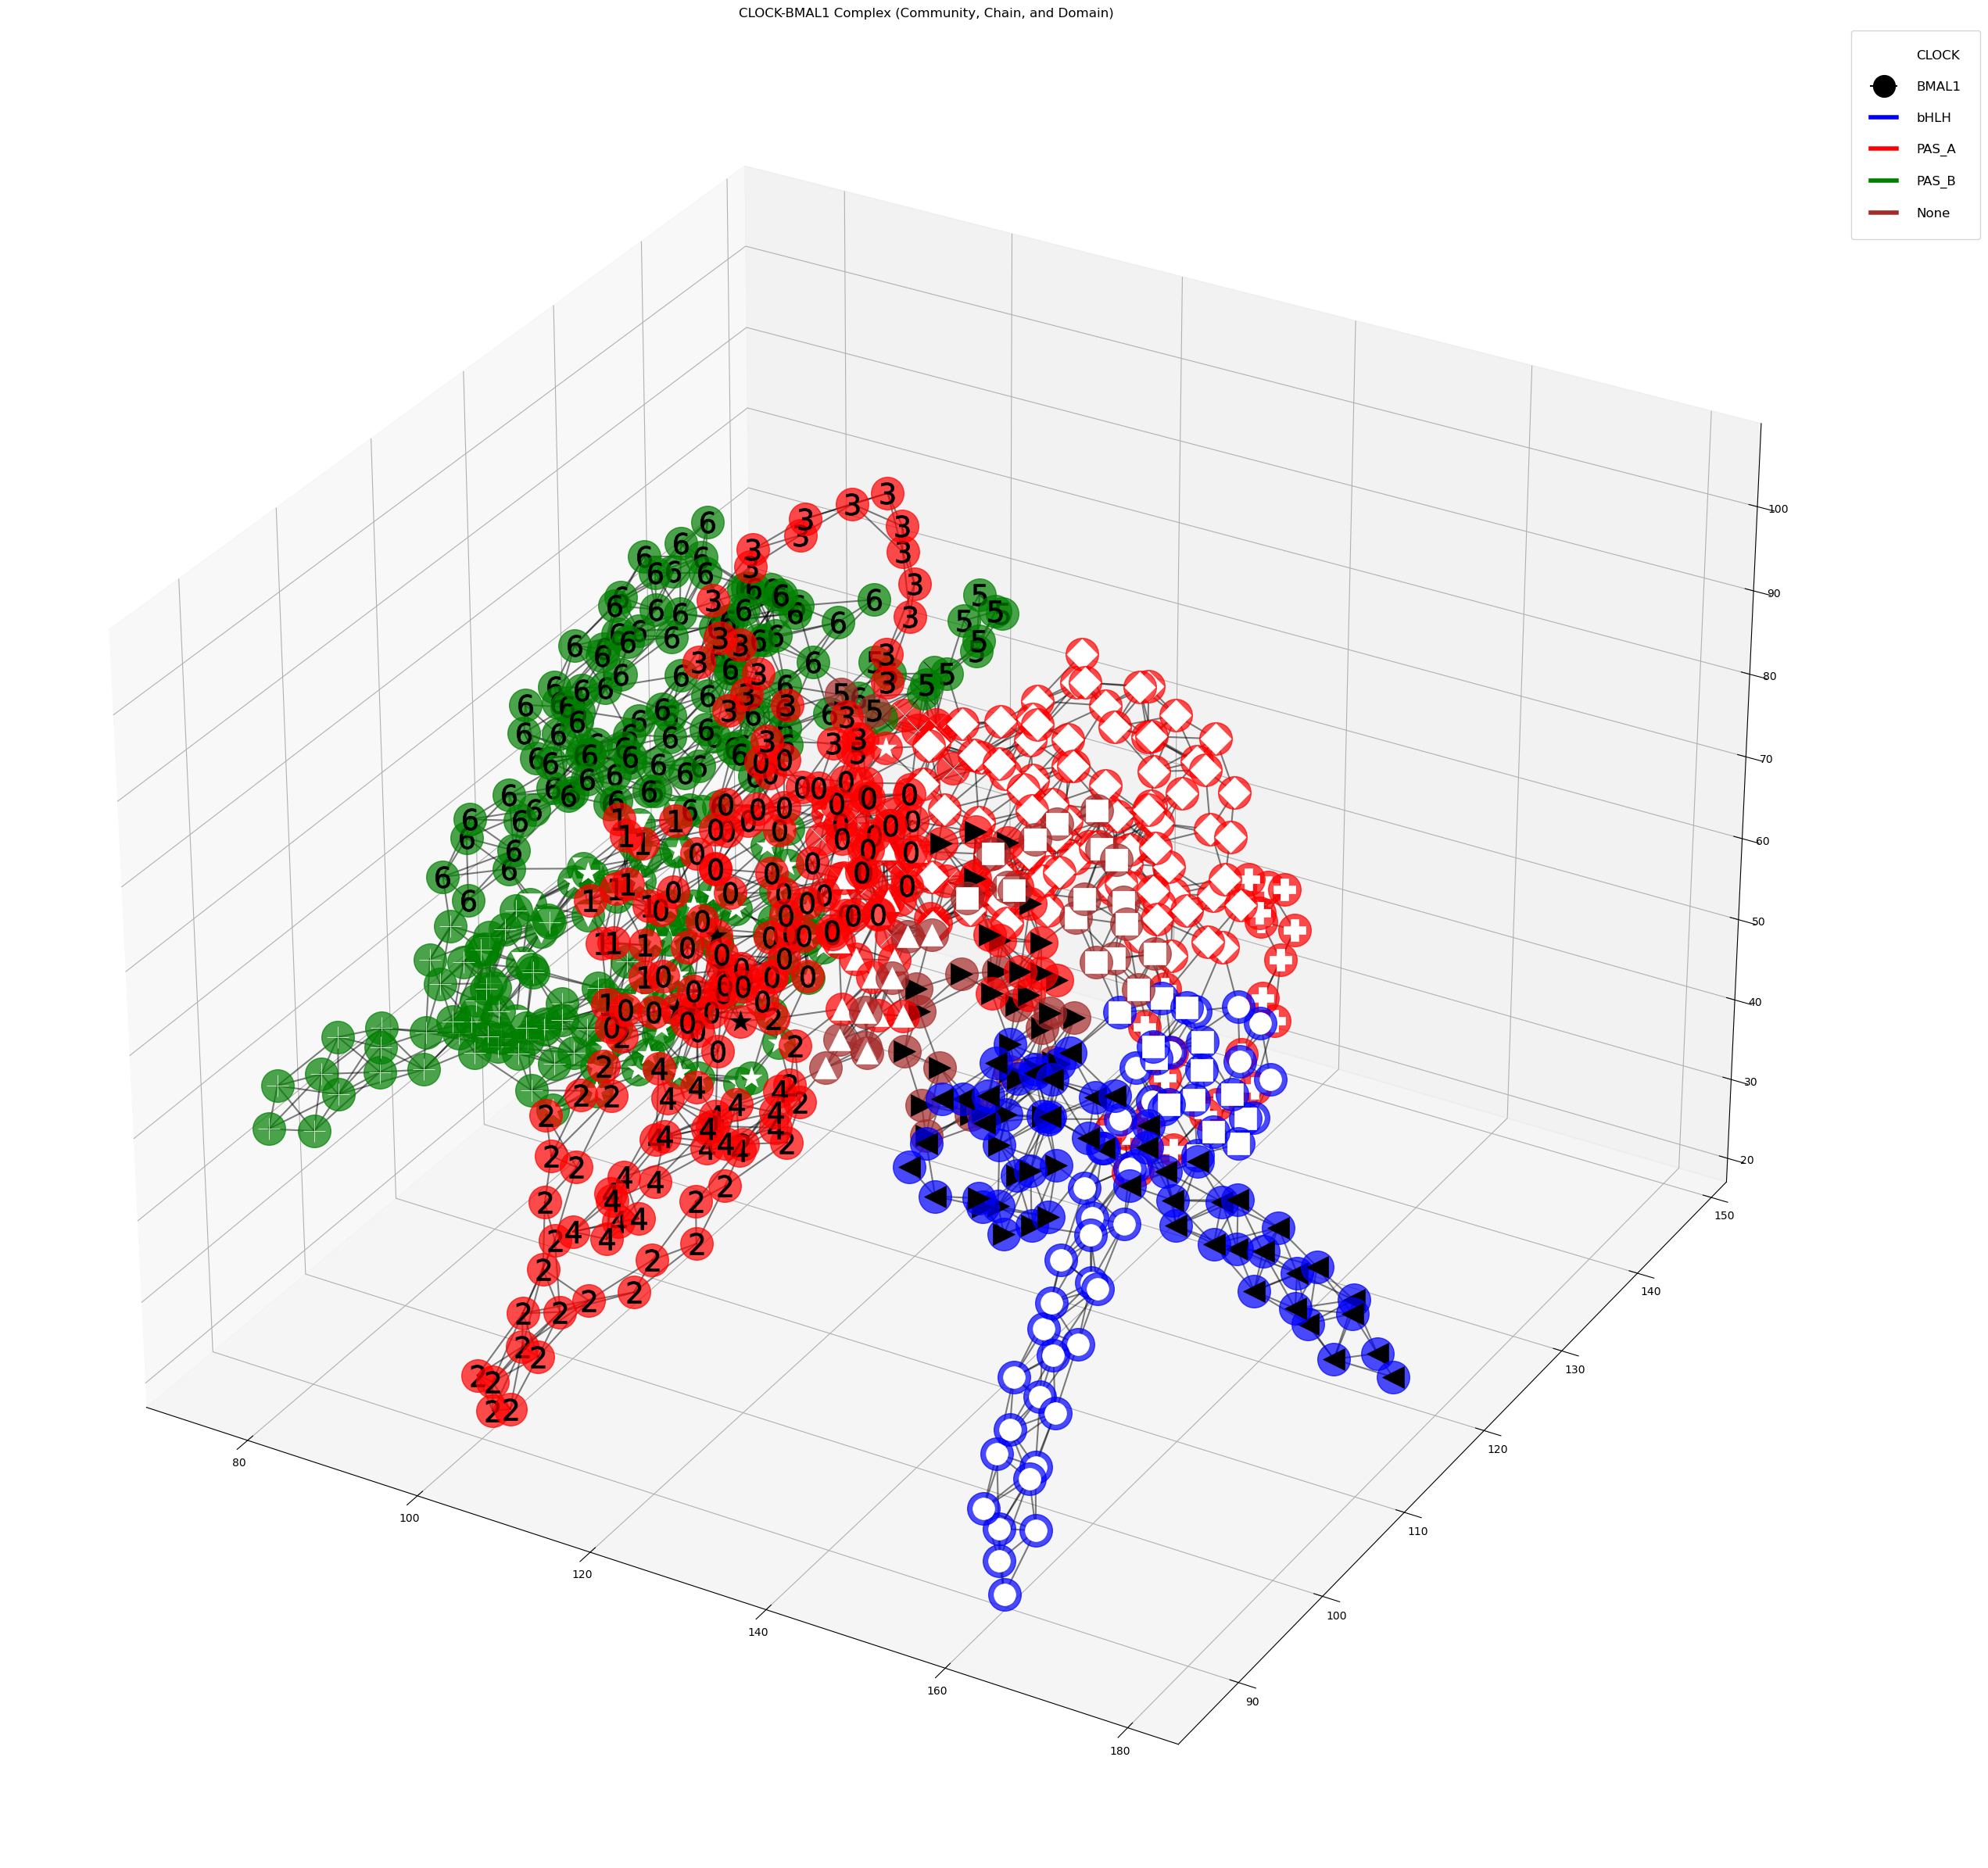

In [74]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import random
import pandas as pd
import numpy as np
import networkx as nx
import community as community_louvain  # Louvain community detection

# Function to generate unique markers
def get_unique_markers(num_markers):
    """Generate a list of unique markers for communities."""
    marker_styles = ['o', 's', '^', 'D', 'x', 'P', '*', '+', 'v', '<', '>']
    # Ensure enough markers
    if num_markers > len(marker_styles):
        marker_styles += ['${}$'.format(i) for i in range(num_markers - len(marker_styles))]
    return marker_styles[:num_markers]

# Function to compute communities using Louvain method
def compute_communities(edges):
    """Compute communities in the graph defined by edges using the Louvain method."""
    G = nx.Graph()
    G.add_edges_from(edges)
    partition = community_louvain.best_partition(G, resolution=1.0)
    return partition

# Function to plot residues with edges, community, chain, and domain information
def plot_residues_3D(residues, edges, ax):
    """Plot residues with their community membership, chain, and domain coloring in 3D."""
    
    # Colors for CLOCK and BMAL1 residues
    color_map = {'CLOCK': 'white', 'BMAL1': 'black'}
    
    # Domain background colors
    domain_colors = {'bHLH': 'blue', 'PAS_A': 'red', 'PAS_B': 'green', 'None': 'brown'}
    
    # Unique markers for each community
    num_communities = residues['Community'].nunique()
    community_markers = get_unique_markers(num_communities)
    marker_map = {comm: community_markers[i] for i, comm in enumerate(residues['Community'].unique())}
    
    # Plotting edges first
    for edge in edges:
        residue_a = residues.loc[residues['Residue'] == edge[0]]
        residue_b = residues.loc[residues['Residue'] == edge[1]]
        # print(edge[0],edge[1])
        
        if not residue_a.empty and not residue_b.empty:
            ax.plot(
                [residue_a['x_zoom'].values[0], residue_b['x_zoom'].values[0]],
                [residue_a['y_zoom'].values[0], residue_b['y_zoom'].values[0]],
                [residue_a['z_zoom'].values[0], residue_b['z_zoom'].values[0]],
                color='black', alpha=0.5  # Edge color and transparency
            )

    # Plotting residues
    for i, row in residues.iterrows():
        # print(i,row)
        # Circular background for domain
        ax.scatter(row['x_zoom'], row['y_zoom'], row['z_zoom'], color=domain_colors[row['Domain']], alpha=0.7, s=900)
        
        # Marker for residue based on community and chain
        marker = marker_map[row['Community']]
        color = color_map[row['Chain']]
        
        ax.scatter(row['x_zoom'], row['y_zoom'], row['z_zoom'], color=color, marker=marker, s=400, linewidth=0.5)

    # Set plot title
    ax.set_title('CLOCK-BMAL1 Complex (Community, Chain, and Domain)')

    # Create a legend for chain and domain
    handles = []
    for chain, color in color_map.items():
        handles.append(plt.Line2D([0], [0], marker='o', color=color, label=chain, markersize=10))
    for domain, color in domain_colors.items():
        handles.append(plt.Line2D([0], [0], color=color, lw=4, label=domain))
    
    ax.legend(handles=handles, loc='upper left', bbox_to_anchor=(1, 1), fontsize='large', markerscale=2,
              borderpad=1.5, labelspacing=1.5, handletextpad=1.5, frameon=True)

# Example Data (replace with actual data)
residues = {
    'Residue': res,
    'x': x,
    'y': y,
    'z': z,
    'Chain': chain,
    'Domain': domain
}
print(len(res),len(x),len(y),len(z),len(chain),len(domain))
residues = pd.DataFrame(residues)
# residues = pd.DataFrame({
#     'Residue': ['R1', 'R2', 'R3', 'R4', 'R5', 'R6'],
#     'x': np.random.rand(6),
#     'y': np.random.rand(6),
#     'z': np.random.rand(6),
#     'Chain': ['CLOCK', 'CLOCK', 'BMAL1', 'BMAL1', 'CLOCK', 'BMAL1'],
#     'Domain': ['Domain_A', 'Domain_A', 'Domain_B', 'Domain_B', 'Domain_C', 'Domain_C']
# })

# Example edges (replace with actual edges)
# edges = [
#     ('R1', 'R2'),
#     ('R3', 'R4'),
#     ('R1', 'R5'),
#     ('R6', 'R3')
# ]

# Apply a zoom factor to the coordinates
zoom_factor = 1.0  # Adjust this to control how much zoom you want
residues['x_zoom'] = residues['x'] * zoom_factor
residues['y_zoom'] = residues['y'] * zoom_factor
residues['z_zoom'] = residues['z'] * zoom_factor
min_x = min(x)
max_x = max(x)
min_y = min(y)
max_y = max(y)
min_z = min(z)
max_z = max(z)
# Compute communities
partition = compute_communities(chainABEdges)
print("Default resolution community count:", len(set(partition.values())))
# print(partition)
residues['Community'] = residues['Residue'].map(partition)
# print(residues)

# Plotting
fig = plt.figure(figsize=(32, 24))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlim(min_x, max_x)  # Set limits for x-axis
ax.set_ylim(min_y, max_y)  # Set limits for y-axis
ax.set_zlim(min_z, max_z)  # Set limits for z-axis
plot_residues_3D(residues, chainABEdges, ax)

plt.tight_layout()
plt.show()